# Day005-1

# [作業目標]
- 利用範例的創建方式, 創建一組資料, 並練習如何取出最大值

# [作業重點]
- 練習創立 DataFrame (In[2])
- 如何取出口數最多的國家 (In[3], Out[3])

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [10]:
import pandas as pd
import numpy as np
country=["Taiwan","United States","Thailand"]
pop=np.random.randint(100000000,size=3) #隨機產生3組0~100的數字
population = {
"國家":country,
"人口":pop
}
population = pd.DataFrame(population)
population

,國家,人口
0,Taiwan,10395565
1,United States,89994083
2,Thailand,81651838


In [11]:
population.loc[population["人口"].idxmax()]

國家    United States
人口         89994083
Name: 1, dtype: object

# Day005-2

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [2]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [4]:
import pandas as pd
data = []
with open("C:/Users/USER/Documents/Github/3rd-ML100Days/homework/Day_005_HW/imagenet_urls_examples.txt", 'r',encoding = 'utf8') as f:
    for line in f:
        line = line.split('\t')
        data.append(line)
data
df = pd.DataFrame(data)
df.head()


,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [5]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, 1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    
    for i in url_list:
        print(i)
        response = requests.get(i)
        try:
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
            print('ok')
        except:
            print('error')

    return img_list

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg

ok
http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg

ok
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg

ok
http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg

ok
http://img100.imageshack.us/img100/3253/forrest004fs9.jpg

error
http://img172.imageshack.us/img172/4606/napo03072en9.jpg

error
http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg

error
http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg

error
http://www.porschemania.it/discus/messages/815/102099.jpg

error
http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg

ok
http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg

ok
http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg

ok
http://farm1.static.flickr.com/29/54608382_ee8bd4f7fa.jpg

ok
http://www.dierentuin.nl/images/jongengiraffe.jpg

error
http://farm4.static.flic

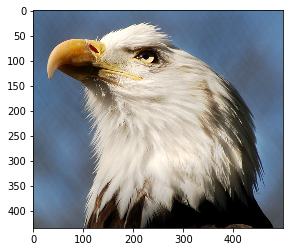

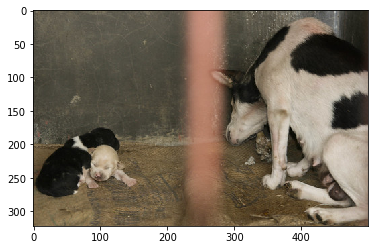

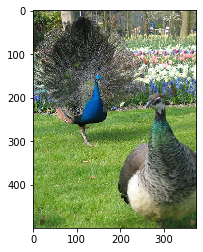

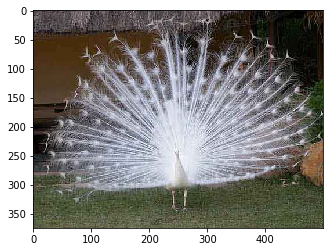

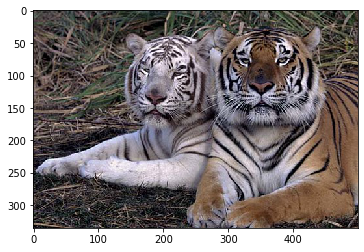

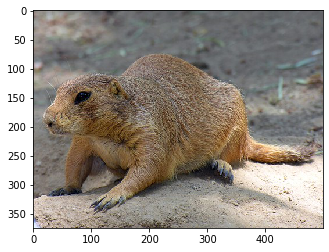

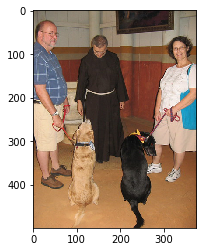

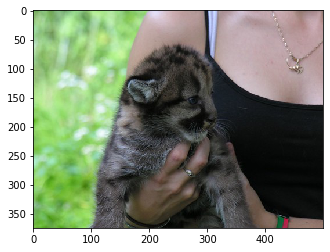

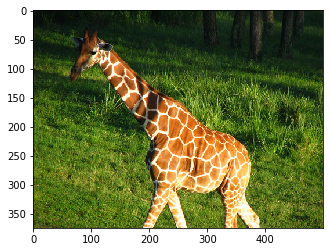

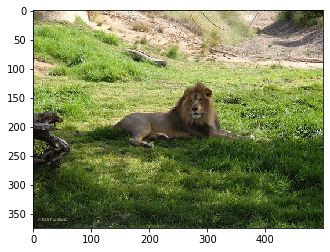

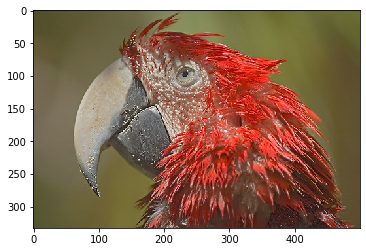

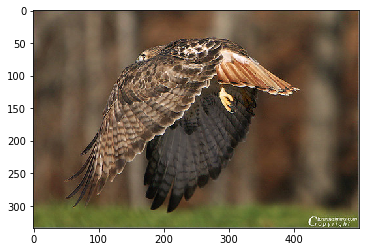

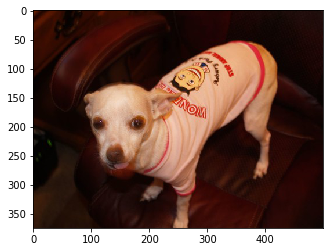

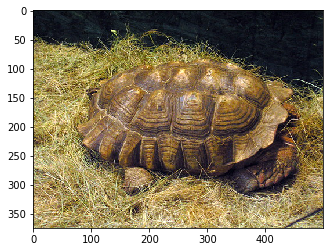

In [12]:
result = img2arr_fromURLs(df[0:25][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 20, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()